In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak

import datetime

In [2]:
fund_em_fund_name_df = ak.fund_em_fund_name()
fund_em_fund_name_df

,基金代码,拼音缩写,基金简称,基金类型,拼音全称
0,000001,HXCZHH,华夏成长混合,混合型-偏股,HUAXIACHENGZHANGHUNHE
1,000002,HXCZHH,华夏成长混合(后端),混合型-偏股,HUAXIACHENGZHANGHUNHE
2,000003,ZHKZZZQA,中海可转债债券A,债券型-可转债,ZHONGHAIKEZHUANZHAIZHAIQUANA
3,000004,ZHKZZZQC,中海可转债债券C,债券型-可转债,ZHONGHAIKEZHUANZHAIZHAIQUANC
4,000005,JSZQXYDQZQ,嘉实增强信用定期债券,债券型-长债,JIASHIZENGQIANGXINYONGDINGQIZHAIQUAN
...,...,...,...,...,...
13626,970063,HAZQHYLGYCYZQ,华安证券合赢六个月持有债券,债券型-混合债,HUAANZHENGQUANHEYINGLIUGEYUECHIYOUZHAIQUAN
13627,970067,XZZGJQLXFSJHHA,兴证资管金麒麟消费升级混合A,混合型-偏股,XINGZHENGZIGUANJINQILINXIAOFEISHENGJIHUNHEA
13628,970068,XZZGJQLXFSJHHB,兴证资管金麒麟消费升级混合B,混合型-偏股,XINGZHENGZIGUANJINQILINXIAOFEISHENGJIHUNHEB
13629,970069,XZZGJQLXFSJHHC,兴证资管金麒麟消费升级混合C,混合型-偏股,XINGZHENGZIGUANJINQILINXIAOFEISHENGJIHUNHEC


In [3]:
fund_em_open_fund_daily_df = ak.fund_em_open_fund_daily()
fund_em_open_fund_daily_df

,基金代码,基金简称,2021-08-13-单位净值,2021-08-13-累计净值,2021-08-12-单位净值,2021-08-12-累计净值,日增长值,日增长率,申购状态,赎回状态,手续费
0,582003,东吴配置优化混合A,2.3095,2.5335,2.2210,2.4450,0.0885,3.98,开放申购,开放赎回,0.15%
1,011707,东吴配置优化混合C,2.3030,2.3030,2.2148,2.2148,0.0882,3.98,开放申购,开放赎回,0.00%
2,002938,中银证券健康产业混合,1.9796,1.9796,1.9287,1.9287,0.0509,2.64,开放申购,开放赎回,0.15%
3,002666,前海开源沪港深创新成长混合A,2.0460,2.1260,1.9940,2.0740,0.0520,2.61,开放申购,开放赎回,0.15%
4,002667,前海开源沪港深创新成长混合C,2.0170,2.0970,1.9660,2.0460,0.0510,2.59,开放申购,开放赎回,0.15%
...,...,...,...,...,...,...,...,...,...,...,...
11702,012172,工银1-3年国开债指数E,,,,,,,开放申购,开放赎回,0.00%
11703,012687,恒越汇优精选三个月混合(FOF),,,,,,,开放申购,开放赎回,0.10%
11704,012783,鹏华长治稳健养老一年持有期混合(FOF),,,,,,,暂停申购,暂停赎回,0.12%
11705,012386,银河颐年稳健养老一年持有混合(FOF),,,,,,,暂停申购,暂停赎回,0.08%


In [23]:
def get_fund_net_worth(fund_code, start_date, end_date):
    
    start_date = pd.to_datetime(start_date, format='%Y/%m/%d')
    end_date = pd.to_datetime(end_date, format='%Y/%m/%d')
    
    df = ak.fund_em_open_fund_info(fund=fund_code)
    mask = (df['净值日期'] > start_date) & (df['净值日期'] <= end_date)
    df = df.loc[mask].reset_index().drop('index', axis=1)
    
    return df

In [90]:
def get_fund_categories(open_fund=False):
    
    fund_em_fund_name_df = ak.fund_em_fund_name()
    
    if open_fund:
        fund_em_open_fund_daily_df = ak.fund_em_open_fund_daily()
        df = pd.merge(fund_em_open_fund_daily_df, fund_em_fund_name_df, on='基金代码')
        
        fund_categories = np.unique(df['基金类型'].values)
    else:        
        fund_categories = np.unique(fund_em_fund_name_df['基金类型'].values)

    return fund_categories

In [91]:
fund_categories = get_fund_categories()

fund_categories

array(['QDII', 'REITs', '债券型-中短债', '债券型-可转债', '债券型-混合债', '债券型-长债',
       '商品（不含QDII）', '指数型-股票', '混合型-偏债', '混合型-偏股', '混合型-平衡', '混合型-灵活',
       '理财型', '股票型', '货币型'], dtype=object)

In [44]:
fund_em_open_fund_daily_df.head()

,基金代码,基金简称,2021-08-13-单位净值,2021-08-13-累计净值,2021-08-12-单位净值,2021-08-12-累计净值,日增长值,日增长率,申购状态,赎回状态,手续费
0,582003,东吴配置优化混合A,2.3095,2.5335,2.2210,2.4450,0.0885,3.98,开放申购,开放赎回,0.15%
1,011707,东吴配置优化混合C,2.3030,2.3030,2.2148,2.2148,0.0882,3.98,开放申购,开放赎回,0.00%
2,002938,中银证券健康产业混合,1.9796,1.9796,1.9287,1.9287,0.0509,2.64,开放申购,开放赎回,0.15%
3,002666,前海开源沪港深创新成长混合A,2.0460,2.1260,1.9940,2.0740,0.0520,2.61,开放申购,开放赎回,0.15%
4,002667,前海开源沪港深创新成长混合C,2.0170,2.0970,1.9660,2.0460,0.0510,2.59,开放申购,开放赎回,0.15%


In [54]:
def get_category_all_funds(category):
    
    df = ak.fund_em_fund_name()
    df = df[df['基金类型'] == category]
    
    fund_code = df['基金代码'].values
    
    return df, fund_code

In [66]:
df, code = get_category_all_funds('股票型')

In [74]:
fund_em_open_fund_daily_df.head()

,基金代码,基金简称,2021-08-13-单位净值,2021-08-13-累计净值,2021-08-12-单位净值,2021-08-12-累计净值,日增长值,日增长率,申购状态,赎回状态,手续费
0,582003,东吴配置优化混合A,2.3095,2.5335,2.2210,2.4450,0.0885,3.98,开放申购,开放赎回,0.15%
1,011707,东吴配置优化混合C,2.3030,2.3030,2.2148,2.2148,0.0882,3.98,开放申购,开放赎回,0.00%
2,002938,中银证券健康产业混合,1.9796,1.9796,1.9287,1.9287,0.0509,2.64,开放申购,开放赎回,0.15%
3,002666,前海开源沪港深创新成长混合A,2.0460,2.1260,1.9940,2.0740,0.0520,2.61,开放申购,开放赎回,0.15%
4,002667,前海开源沪港深创新成长混合C,2.0170,2.0970,1.9660,2.0460,0.0510,2.59,开放申购,开放赎回,0.15%


In [75]:
fund_em_fund_name_df.head()

,基金代码,拼音缩写,基金简称,基金类型,拼音全称
0,000001,HXCZHH,华夏成长混合,混合型-偏股,HUAXIACHENGZHANGHUNHE
1,000002,HXCZHH,华夏成长混合(后端),混合型-偏股,HUAXIACHENGZHANGHUNHE
2,000003,ZHKZZZQA,中海可转债债券A,债券型-可转债,ZHONGHAIKEZHUANZHAIZHAIQUANA
3,000004,ZHKZZZQC,中海可转债债券C,债券型-可转债,ZHONGHAIKEZHUANZHAIZHAIQUANC
4,000005,JSZQXYDQZQ,嘉实增强信用定期债券,债券型-长债,JIASHIZENGQIANGXINYONGDINGQIZHAIQUAN


In [80]:
df = pd.merge(fund_em_open_fund_daily_df, fund_em_fund_name_df, on='基金代码')

In [83]:
np.unique(df['基金类型'].values)

array(['QDII', '债券型-中短债', '债券型-可转债', '债券型-混合债', '债券型-长债', '商品（不含QDII）',
       '指数型-股票', '混合型-偏债', '混合型-偏股', '混合型-平衡', '混合型-灵活', '股票型'],
      dtype=object)

In [84]:
fund_categories

array(['QDII', 'REITs', '债券型-中短债', '债券型-可转债', '债券型-混合债', '债券型-长债',
       '商品（不含QDII）', '指数型-股票', '混合型-偏债', '混合型-偏股', '混合型-平衡', '混合型-灵活',
       '理财型', '股票型', '货币型'], dtype=object)

In [92]:
get_fund_net_worth('002667', '2020-01-01', '2021-08-13', )

,净值日期,单位净值,日增长率
0,2020-01-02,1.406,2.2545
1,2020-01-03,1.408,0.1422
2,2020-01-06,1.407,-0.0710
3,2020-01-07,1.430,1.6347
4,2020-01-08,1.418,-0.8392
...,...,...,...
388,2021-08-09,1.831,2.2900
389,2021-08-10,1.837,0.3300
390,2021-08-11,1.903,3.5900
391,2021-08-12,1.966,3.3100


In [93]:
def get_fund_cumulative_return(fund_code, start_date, end_date):
    
    start_date = pd.to_datetime(start_date, format='%Y/%m/%d')
    end_date = pd.to_datetime(end_date, format='%Y/%m/%d')
    
    df = ak.fund_em_open_fund_info(fund=fund_code, indicator="累计收益率走势")
    mask = (df['净值日期'] > start_date) & (df['净值日期'] <= end_date)
    df = df.loc[mask].reset_index().drop('index', axis=1)
    
    return df

<AxesSubplot:>

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32047 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35745 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 32047 missing from c

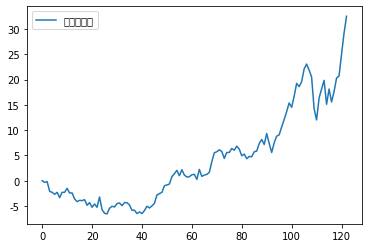

In [95]:
get_fund_cumulative_return('002667', '2020-01-01', '2021-08-13').plot()